In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Data Analysis

In [2]:
df=pd.read_csv('supermarket_sales - Sheet1.csv')

In [3]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


Invoice ID.
Computer generated sales slip invoice identification number.

Branch.
Branch of supercenter (3 branches are available identified by A, B and C).

City.
Location of supercenters.

Customer type.
Type of customers, recorded by Members for customers using member card and Normal for without member card.

Gender.
Gender type of customer.

Product line.
General item categorization groups.

Unit price.
Price of each product in $.

Quantity.
Number of products purchased by customer.

Tax 5%.
5% tax fee for customer buying.

Total.
Total price including tax.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

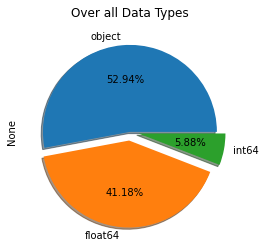

In [5]:
df.isnull().sum()
df.dtypes.value_counts().plot(kind='pie',autopct='%1.2f%%',explode=[0,0.1,0.1],shadow=True)
plt.title('Over all Data Types')
plt.show()

In [6]:
df.shape

(1000, 17)

In [7]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


#### Missing value

In [8]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

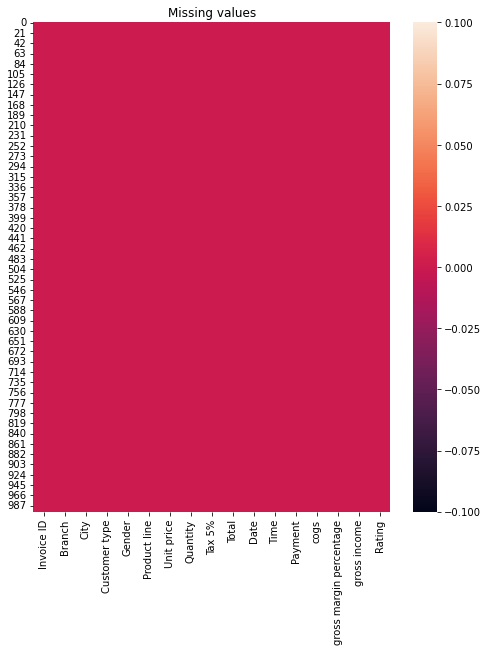

In [9]:
plt.figure(figsize=(8,9))
sns.heatmap(df.isnull())
plt.title('Missing values')
plt.show()

### Segregate the data on the basis of categorical and numerical columns.

In [10]:
df.shape

(1000, 17)

In [11]:
Num=[]
for col in df.columns:
    if (df[col].dtype==int)or (df[col].dtype==float):
        Num.append(col)
print (Num)

['Unit price', 'Tax 5%', 'Total', 'cogs', 'gross margin percentage', 'gross income', 'Rating']


In [12]:
categorical=[]
for col in df.columns:
    if  (df[col].dtype==object):
        categorical.append(col)
print (categorical)

['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Date', 'Time', 'Payment']


### Data Preprocessing

##### Count unique values

In [13]:
unique_value = df.columns
for col in unique_value:
    print("{}: {}".format(col,len(df[col].unique())))

Invoice ID: 1000
Branch: 3
City: 3
Customer type: 2
Gender: 2
Product line: 6
Unit price: 943
Quantity: 10
Tax 5%: 990
Total: 990
Date: 89
Time: 506
Payment: 3
cogs: 990
gross margin percentage: 1
gross income: 990
Rating: 61


From our observation above, The data is quite clean:

* Data have 1000 samples without missing any information
* Almost data types are correct, however, we may need to convert the date and time later on
* The Invoice ID need to be excluded as not to cause overfitting
* The gross margin percentage has only 1 value, which does not given us any meaning
So we drop Invoice ID and gross margin percentage attributes first

In [14]:
df = df.drop(columns=['Invoice ID','gross margin percentage'])
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,30.2085,5.3


### Data Visualization

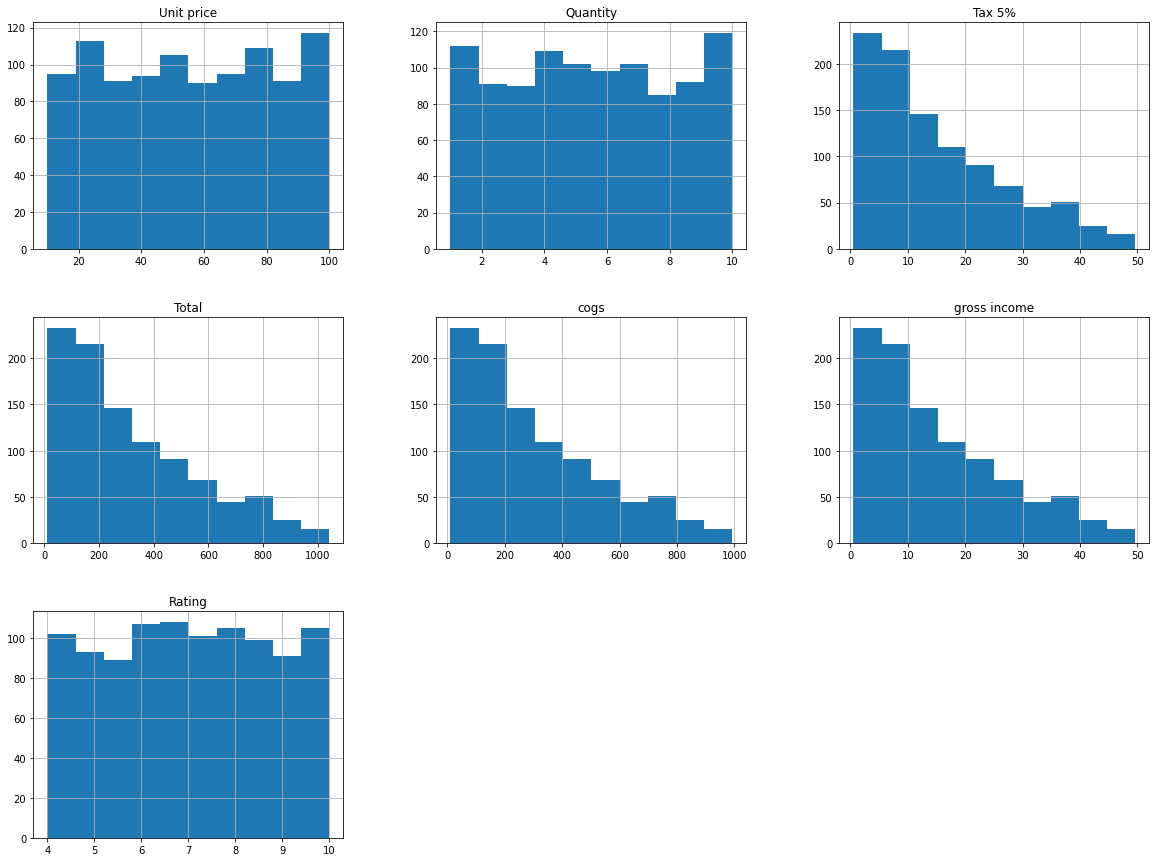

In [15]:
df.hist(figsize=(20,15));

### Branch

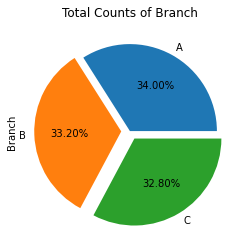

In [16]:
df['Branch'].value_counts().plot(kind='pie',autopct='%1.2f%%',explode=[0,0.1,0.1])
plt.title('Total Counts of Branch')
plt.show()

### Gender

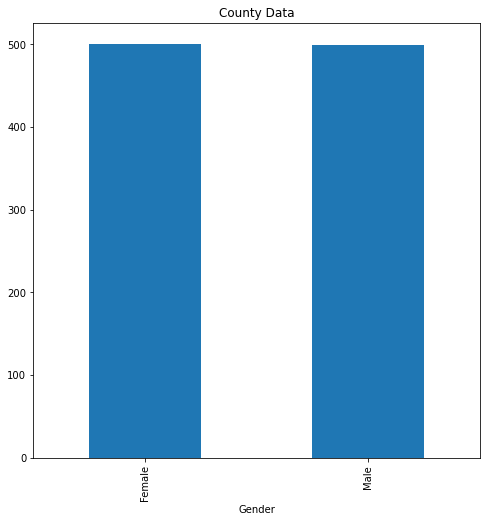

In [17]:
plt.figure(figsize=(8,8))
df.value_counts('Gender').plot(kind='bar')
plt.title('County Data');

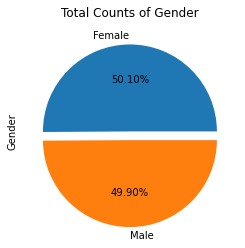

In [18]:
df['Gender'].value_counts().plot(kind='pie',autopct='%1.2f%%',explode=[0,0.1])
plt.title('Total Counts of Gender')
plt.show()

There is a two different type of Total Counts of Gender type 1. Male 2.Female. Female Total count is(50.1) is higher than Male total count (49.9)

### Product line

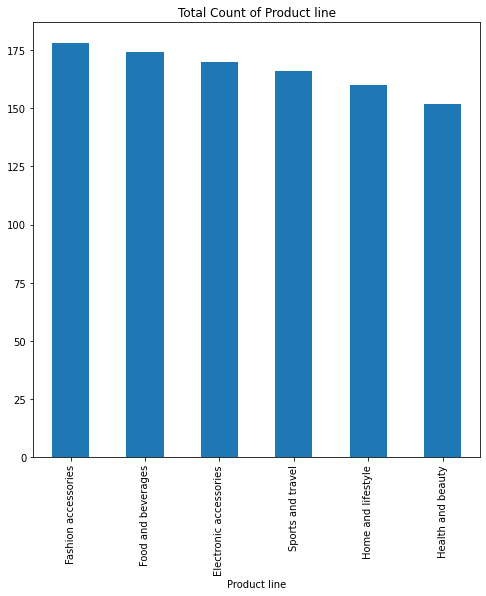

In [19]:
plt.figure(figsize=(8,8))
df.value_counts('Product line').plot(kind='bar')
plt.title('Total Count of Product line');

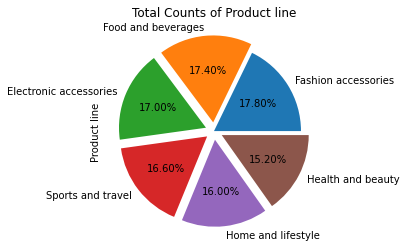

In [20]:
df['Product line'].value_counts().plot(kind='pie',autopct='%1.2f%%',explode=[0,0.1,0.1,0.1,0.1,0.1])
plt.title('Total Counts of Product line')
plt.show()

### Customer Type

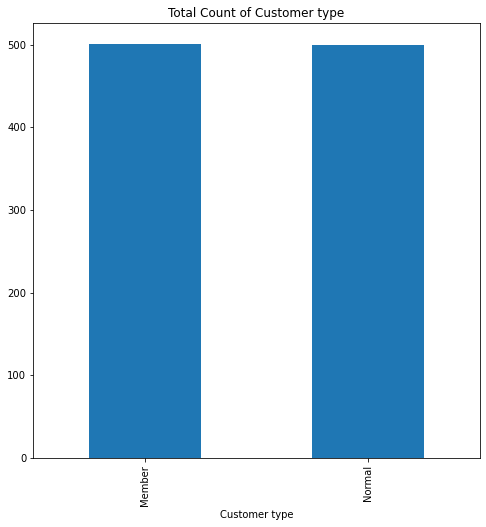

In [21]:
plt.figure(figsize=(8,8))
df.value_counts('Customer type').plot(kind='bar')
plt.title('Total Count of Customer type');

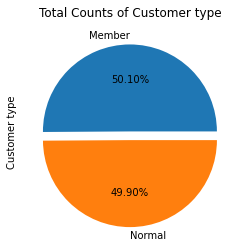

In [22]:
df['Customer type'].value_counts().plot(kind='pie',autopct='%1.2f%%',explode=[0,0.1])
plt.title('Total Counts of Customer type')
plt.show()

There is a two different type of Total Counts of customer type 1. Member 2. Normal.
Member Customer type(50.1) is higher than normal customer type (49.9)

### Payment Of total Count

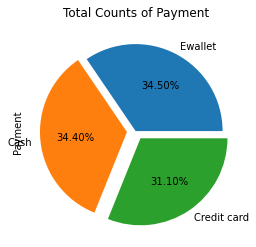

In [23]:
df['Payment'].value_counts().plot(kind='pie',autopct='%1.2f%%',explode=[0,0.1,0.1])
plt.title('Total Counts of Payment')
plt.show()

### Total Quantity Group

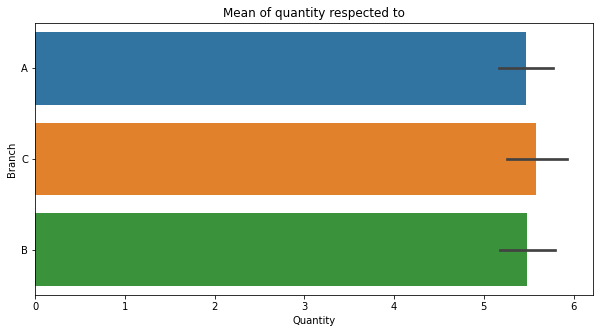

In [24]:
def quantity_group(df, group_name):
    plt.figure(figsize=(10,5))
    
    sns.barplot(x='Quantity',y=group_name,data=df)
    plt.title('Mean of quantity respected to')
    plt.show()
    
quantity_group(df,'Branch')

From this graph, we can see that Branch C may have more quantity sales than Branch A and Branch B

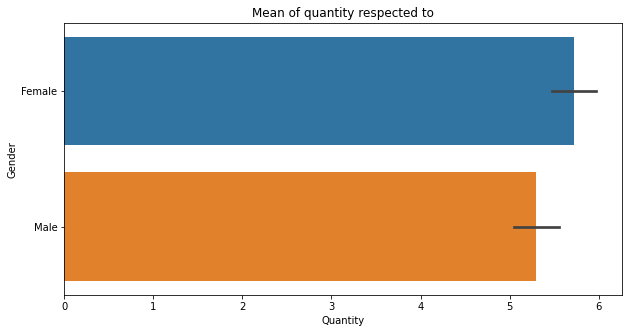

In [25]:
quantity_group(df,'Gender')

the same result has been shown on Gender. Mostly, Female will buy more than Male.

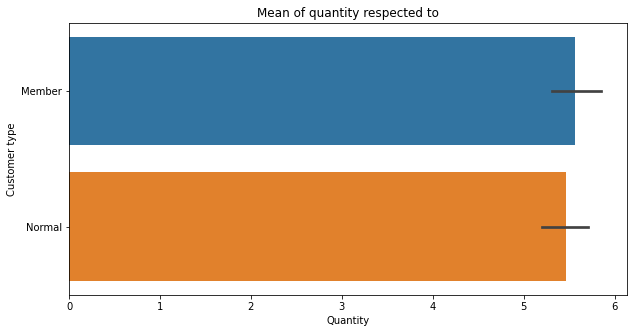

In [26]:
quantity_group(df,'Customer type')

It was suprising that the Customer type does not affect much to the Quantity. If you run linear regression on this attribute, you can find that it's t-statistic value is nearly equal 0, and P-value is considerable high. So we can ignore this variable when we create model.

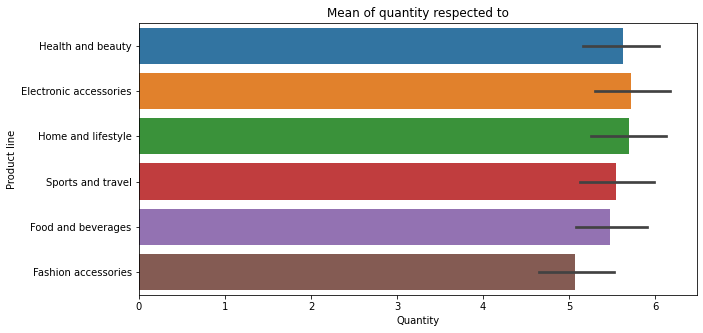

In [27]:
quantity_group(df,'Product line')

With this chart, there is a key-point that we can see. All Product line are almost have the same mean of Quantity, except the Fashion accessories. To improve the model, we can create a new attribute called IsFashion which show whether the product line is fashion accessories. Also, because Produce line has many value, this may cause overfitting, so I also remove it.

### Count of Rating

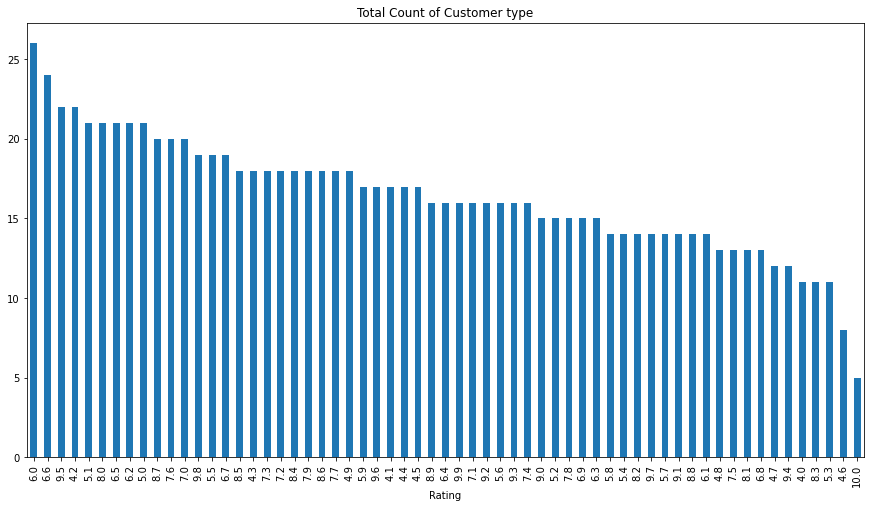

In [28]:
plt.figure(figsize=(15,8))
df.value_counts('Rating').plot(kind='bar')
plt.title('Total Count of Customer type')
plt.show()

i can see this graph 6.0 is high than other rating.
And 10.0 is Low in other than rating.

In [29]:
import datetime as dt
import calendar

In [30]:
df['IsFashion'] = (df['Product line']=='Fashion accessories')
df = df.drop(columns='Product line')

In [31]:
df['Time'] = pd.to_datetime(df['Time'])
df['Date'] = pd.to_datetime(df['Date'])

df['Hour'] = df['Time'].dt.hour
df['Minute'] = df['Time'].dt.minute

df['Day'] = (df['Date']).dt.day
df['Month'] = (df['Date']).dt.month

df = df.drop(columns=['Time','Date'])

df.head()

,Branch,City,Customer type,Gender,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross income,Rating,IsFashion,Hour,Minute,Day,Month
0,A,Yangon,Member,Female,74.69,7,26.1415,548.9715,Ewallet,522.83,26.1415,9.1,False,13,8,5,1
1,C,Naypyitaw,Normal,Female,15.28,5,3.8200,80.2200,Cash,76.40,3.8200,9.6,False,10,29,8,3
2,A,Yangon,Normal,Male,46.33,7,16.2155,340.5255,Credit card,324.31,16.2155,7.4,False,13,23,3,3
3,A,Yangon,Member,Male,58.22,8,23.2880,489.0480,Ewallet,465.76,23.2880,8.4,False,20,33,27,1
4,A,Yangon,Normal,Male,86.31,7,30.2085,634.3785,Ewallet,604.17,30.2085,5.3,False,10,37,8,2


By using the extracted attribute Hour, we can see the Quantity usually increases in the period of  10th  hour to  11th  hour, and from  15th  hour to  16th  hour. Furthermore, it reachs the peak at  12th  hour.

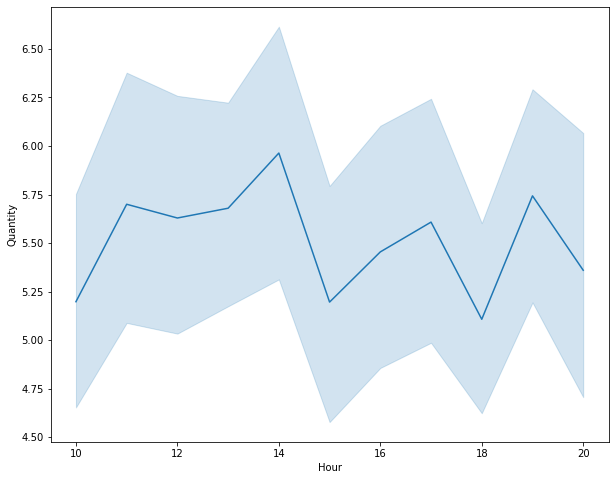

In [32]:
plt.figure(figsize=(10,8))
sns.lineplot(data=df,x='Hour',y='Quantity')
plt.show()

 we need to check whether or target is balance or imbalance? If the target data is imbalance, we must use some technique (such as SMOTE, down-sampling, etc). Luckily, with the histogram, we can see that the data is quite balance since the mean and median does not separate too much.

#### Top 10 High Quantity Super Market

In [33]:
d=df.sort_values(by='Quantity',ascending=False)
d.head(10)

,Branch,City,Customer type,Gender,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross income,Rating,IsFashion,Hour,Minute,Day,Month
761,B,Mandalay,Normal,Male,72.13,10,36.065,757.365,Credit card,721.3,36.065,4.2,False,15,12,31,1
269,A,Yangon,Member,Female,35.54,10,17.770,373.170,Ewallet,355.4,17.770,7.0,False,13,34,4,1
797,A,Yangon,Member,Female,24.49,10,12.245,257.145,Cash,244.9,12.245,8.1,False,15,15,22,2
182,A,Yangon,Member,Male,15.50,10,7.750,162.750,Ewallet,155.0,7.750,8.0,False,10,55,23,3
565,A,Yangon,Normal,Female,81.21,10,40.605,852.705,Credit card,812.1,40.605,6.3,False,13,1,17,1
623,B,Mandalay,Normal,Female,83.25,10,41.625,874.125,Credit card,832.5,41.625,4.4,True,11,25,12,1
278,C,Naypyitaw,Member,Male,70.99,10,35.495,745.395,Cash,709.9,35.495,5.7,True,16,28,20,3
279,A,Yangon,Member,Male,44.02,10,22.010,462.210,Credit card,440.2,22.010,9.6,False,19,57,20,3
727,B,Mandalay,Normal,Male,69.74,10,34.870,732.270,Credit card,697.4,34.870,8.9,False,17,49,5,3
627,B,Mandalay,Member,Male,82.58,10,41.290,867.090,Cash,825.8,41.290,5.0,False,14,41,14,3


#### Top 10 Low Quantity Super Markt

In [34]:
d=df.sort_values(by='Quantity',ascending= True)
d.head(10)

,Branch,City,Customer type,Gender,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross income,Rating,IsFashion,Hour,Minute,Day,Month
321,C,Naypyitaw,Normal,Female,39.42,1,1.9710,41.3910,Cash,39.42,1.9710,8.4,False,15,8,18,1
947,B,Mandalay,Member,Male,53.78,1,2.6890,56.4690,Ewallet,53.78,2.6890,4.7,True,20,13,3,2
415,B,Mandalay,Normal,Male,96.11,1,4.8055,100.9155,Ewallet,96.11,4.8055,7.8,False,16,28,25,1
417,C,Naypyitaw,Member,Female,81.51,1,4.0755,85.5855,Ewallet,81.51,4.0755,9.2,False,10,57,22,1
88,A,Yangon,Normal,Male,42.47,1,2.1235,44.5935,Cash,42.47,2.1235,5.7,False,16,57,2,1
886,A,Yangon,Member,Male,87.90,1,4.3950,92.2950,Ewallet,87.90,4.3950,6.7,False,19,42,5,2
424,C,Naypyitaw,Normal,Male,16.28,1,0.8140,17.0940,Cash,16.28,0.8140,5.0,True,15,36,9,3
745,C,Naypyitaw,Member,Female,38.42,1,1.9210,40.3410,Cash,38.42,1.9210,8.6,False,16,33,2,2
143,C,Naypyitaw,Member,Female,30.41,1,1.5205,31.9305,Credit card,30.41,1.5205,8.4,False,10,36,22,2
841,B,Mandalay,Normal,Male,60.30,1,3.0150,63.3150,Cash,60.30,3.0150,6.0,False,17,38,28,2


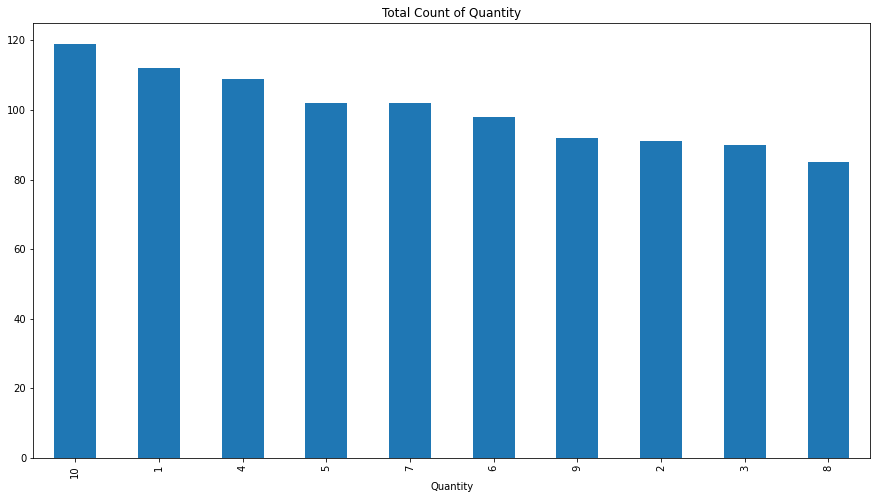

In [35]:
plt.figure(figsize=(15,8))
df.value_counts('Quantity').plot(kind='bar')
plt.title('Total Count of Quantity')
plt.show()

#### Top 10 High Gross Income in Super Market

In [36]:
d1=df.sort_values(by='gross income',ascending = False)
d1.head(10)

,Branch,City,Customer type,Gender,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross income,Rating,IsFashion,Hour,Minute,Day,Month
350,C,Naypyitaw,Member,Female,99.30,10,49.650,1042.650,Credit card,993.0,49.650,6.6,True,14,53,15,2
167,A,Yangon,Normal,Male,98.98,10,49.490,1039.290,Credit card,989.8,49.490,8.7,True,16,20,8,2
557,C,Naypyitaw,Member,Female,98.52,10,49.260,1034.460,Ewallet,985.2,49.260,4.5,False,20,23,30,1
699,C,Naypyitaw,Normal,Male,97.50,10,48.750,1023.750,Ewallet,975.0,48.750,8.0,False,16,18,12,1
996,B,Mandalay,Normal,Female,97.38,10,48.690,1022.490,Ewallet,973.8,48.690,4.4,False,17,16,2,3
792,B,Mandalay,Normal,Female,97.37,10,48.685,1022.385,Credit card,973.7,48.685,4.9,False,13,48,15,1
422,C,Naypyitaw,Member,Female,97.21,10,48.605,1020.705,Credit card,972.1,48.605,8.7,True,13,0,8,2
166,C,Naypyitaw,Normal,Male,95.58,10,47.790,1003.590,Cash,955.8,47.790,4.8,False,13,32,16,1
357,C,Naypyitaw,Normal,Female,95.44,10,47.720,1002.120,Cash,954.4,47.720,5.2,False,13,45,9,1
429,A,Yangon,Member,Female,90.65,10,45.325,951.825,Ewallet,906.5,45.325,7.3,False,10,53,8,3


#### Top 10 Low Gross Income in Super Market

In [37]:
d1=df.sort_values(by='gross income',ascending = True)
d1.head(10)

,Branch,City,Customer type,Gender,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross income,Rating,IsFashion,Hour,Minute,Day,Month
822,C,Naypyitaw,Member,Male,10.17,1,0.5085,10.6785,Cash,10.17,0.5085,5.9,False,14,15,7,2
629,A,Yangon,Normal,Female,12.09,1,0.6045,12.6945,Credit card,12.09,0.6045,8.2,True,18,19,26,1
223,C,Naypyitaw,Member,Female,12.54,1,0.6270,13.1670,Cash,12.54,0.6270,8.2,True,12,38,21,2
443,C,Naypyitaw,Normal,Male,12.78,1,0.6390,13.4190,Ewallet,12.78,0.6390,9.5,True,14,11,8,1
402,C,Naypyitaw,Member,Male,13.98,1,0.6990,14.6790,Ewallet,13.98,0.6990,9.8,False,13,38,4,2
282,A,Yangon,Normal,Female,15.34,1,0.7670,16.1070,Cash,15.34,0.7670,6.5,False,11,9,6,1
53,C,Naypyitaw,Member,Male,15.43,1,0.7715,16.2015,Credit card,15.43,0.7715,6.1,True,15,46,25,1
962,A,Yangon,Normal,Female,15.50,1,0.7750,16.2750,Credit card,15.50,0.7750,7.4,True,15,23,19,3
424,C,Naypyitaw,Normal,Male,16.28,1,0.8140,17.0940,Cash,16.28,0.8140,5.0,True,15,36,9,3
808,B,Mandalay,Normal,Female,17.75,1,0.8875,18.6375,Cash,17.75,0.8875,8.6,False,10,38,14,1


#### Top 10 High Rating in Super Market

In [38]:
d2=df.sort_values(by='Rating',ascending = False)
d2.head(10)

,Branch,City,Customer type,Gender,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross income,Rating,IsFashion,Hour,Minute,Day,Month
387,A,Yangon,Normal,Female,32.32,10,16.1600,339.3600,Credit card,323.20,16.1600,10.0,False,16,49,20,2
159,B,Mandalay,Normal,Male,93.39,6,28.0170,588.3570,Ewallet,560.34,28.0170,10.0,False,19,18,27,3
853,B,Mandalay,Normal,Female,52.79,10,26.3950,554.2950,Ewallet,527.90,26.3950,10.0,False,11,58,25,2
62,B,Mandalay,Member,Female,55.07,9,24.7815,520.4115,Ewallet,495.63,24.7815,10.0,False,13,40,3,2
60,C,Naypyitaw,Member,Female,24.74,3,3.7110,77.9310,Credit card,74.22,3.7110,10.0,False,17,47,15,2
382,B,Mandalay,Normal,Female,99.69,5,24.9225,523.3725,Cash,498.45,24.9225,9.9,False,12,9,14,1
194,A,Yangon,Normal,Male,32.71,5,8.1775,171.7275,Credit card,163.55,8.1775,9.9,False,11,30,19,3
179,C,Naypyitaw,Member,Male,86.80,3,13.0200,273.4200,Ewallet,260.40,13.0200,9.9,False,16,47,28,1
86,C,Naypyitaw,Normal,Male,76.52,5,19.1300,401.7300,Cash,382.60,19.1300,9.9,True,10,23,25,3
23,A,Yangon,Normal,Male,34.56,5,8.6400,181.4400,Ewallet,172.80,8.6400,9.9,False,11,15,17,2


#### Top 10 Low Rating in Super Market

In [39]:
d2=df.sort_values(by='Rating',ascending = True)
d2.head(10)

,Branch,City,Customer type,Gender,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross income,Rating,IsFashion,Hour,Minute,Day,Month
848,C,Naypyitaw,Member,Female,72.88,9,32.7960,688.7160,Cash,655.92,32.7960,4.0,False,19,38,8,1
672,B,Mandalay,Normal,Female,73.41,3,11.0115,231.2415,Ewallet,220.23,11.0115,4.0,False,13,10,2,3
72,B,Mandalay,Member,Female,48.52,3,7.2780,152.8380,Ewallet,145.56,7.2780,4.0,False,18,17,5,3
618,A,Yangon,Member,Male,98.53,6,29.5590,620.7390,Credit card,591.18,29.5590,4.0,False,11,22,23,1
876,C,Naypyitaw,Member,Male,52.35,1,2.6175,54.9675,Cash,52.35,2.6175,4.0,True,17,49,12,2
85,C,Naypyitaw,Normal,Female,83.06,7,29.0710,610.4910,Ewallet,581.42,29.0710,4.0,False,14,31,5,3
790,A,Yangon,Normal,Male,46.41,1,2.3205,48.7305,Credit card,46.41,2.3205,4.0,True,20,6,3,3
379,B,Mandalay,Normal,Female,23.65,4,4.7300,99.3300,Credit card,94.60,4.7300,4.0,False,13,32,30,1
328,B,Mandalay,Member,Male,51.13,4,10.2260,214.7460,Credit card,204.52,10.2260,4.0,False,10,11,25,1
643,C,Naypyitaw,Member,Female,72.52,8,29.0080,609.1680,Credit card,580.16,29.0080,4.0,False,19,26,30,3


### BOXPLOT

In [40]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross income,Rating,Hour,Minute,Day,Month
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,15.379369,6.97270,14.910000,30.09800,15.256000,1.993000
std,26.494628,2.923431,11.708825,245.885335,234.17651,11.708825,1.71858,3.186857,16.88068,8.693563,0.835254
min,10.080000,1.000000,0.508500,10.678500,10.17000,0.508500,4.00000,10.000000,0.00000,1.000000,1.000000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,5.924875,5.50000,12.000000,16.00000,8.000000,1.000000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,12.088000,7.00000,15.000000,30.00000,15.000000,2.000000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,22.445250,8.50000,18.000000,44.00000,23.000000,3.000000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,49.650000,10.00000,20.000000,59.00000,31.000000,3.000000


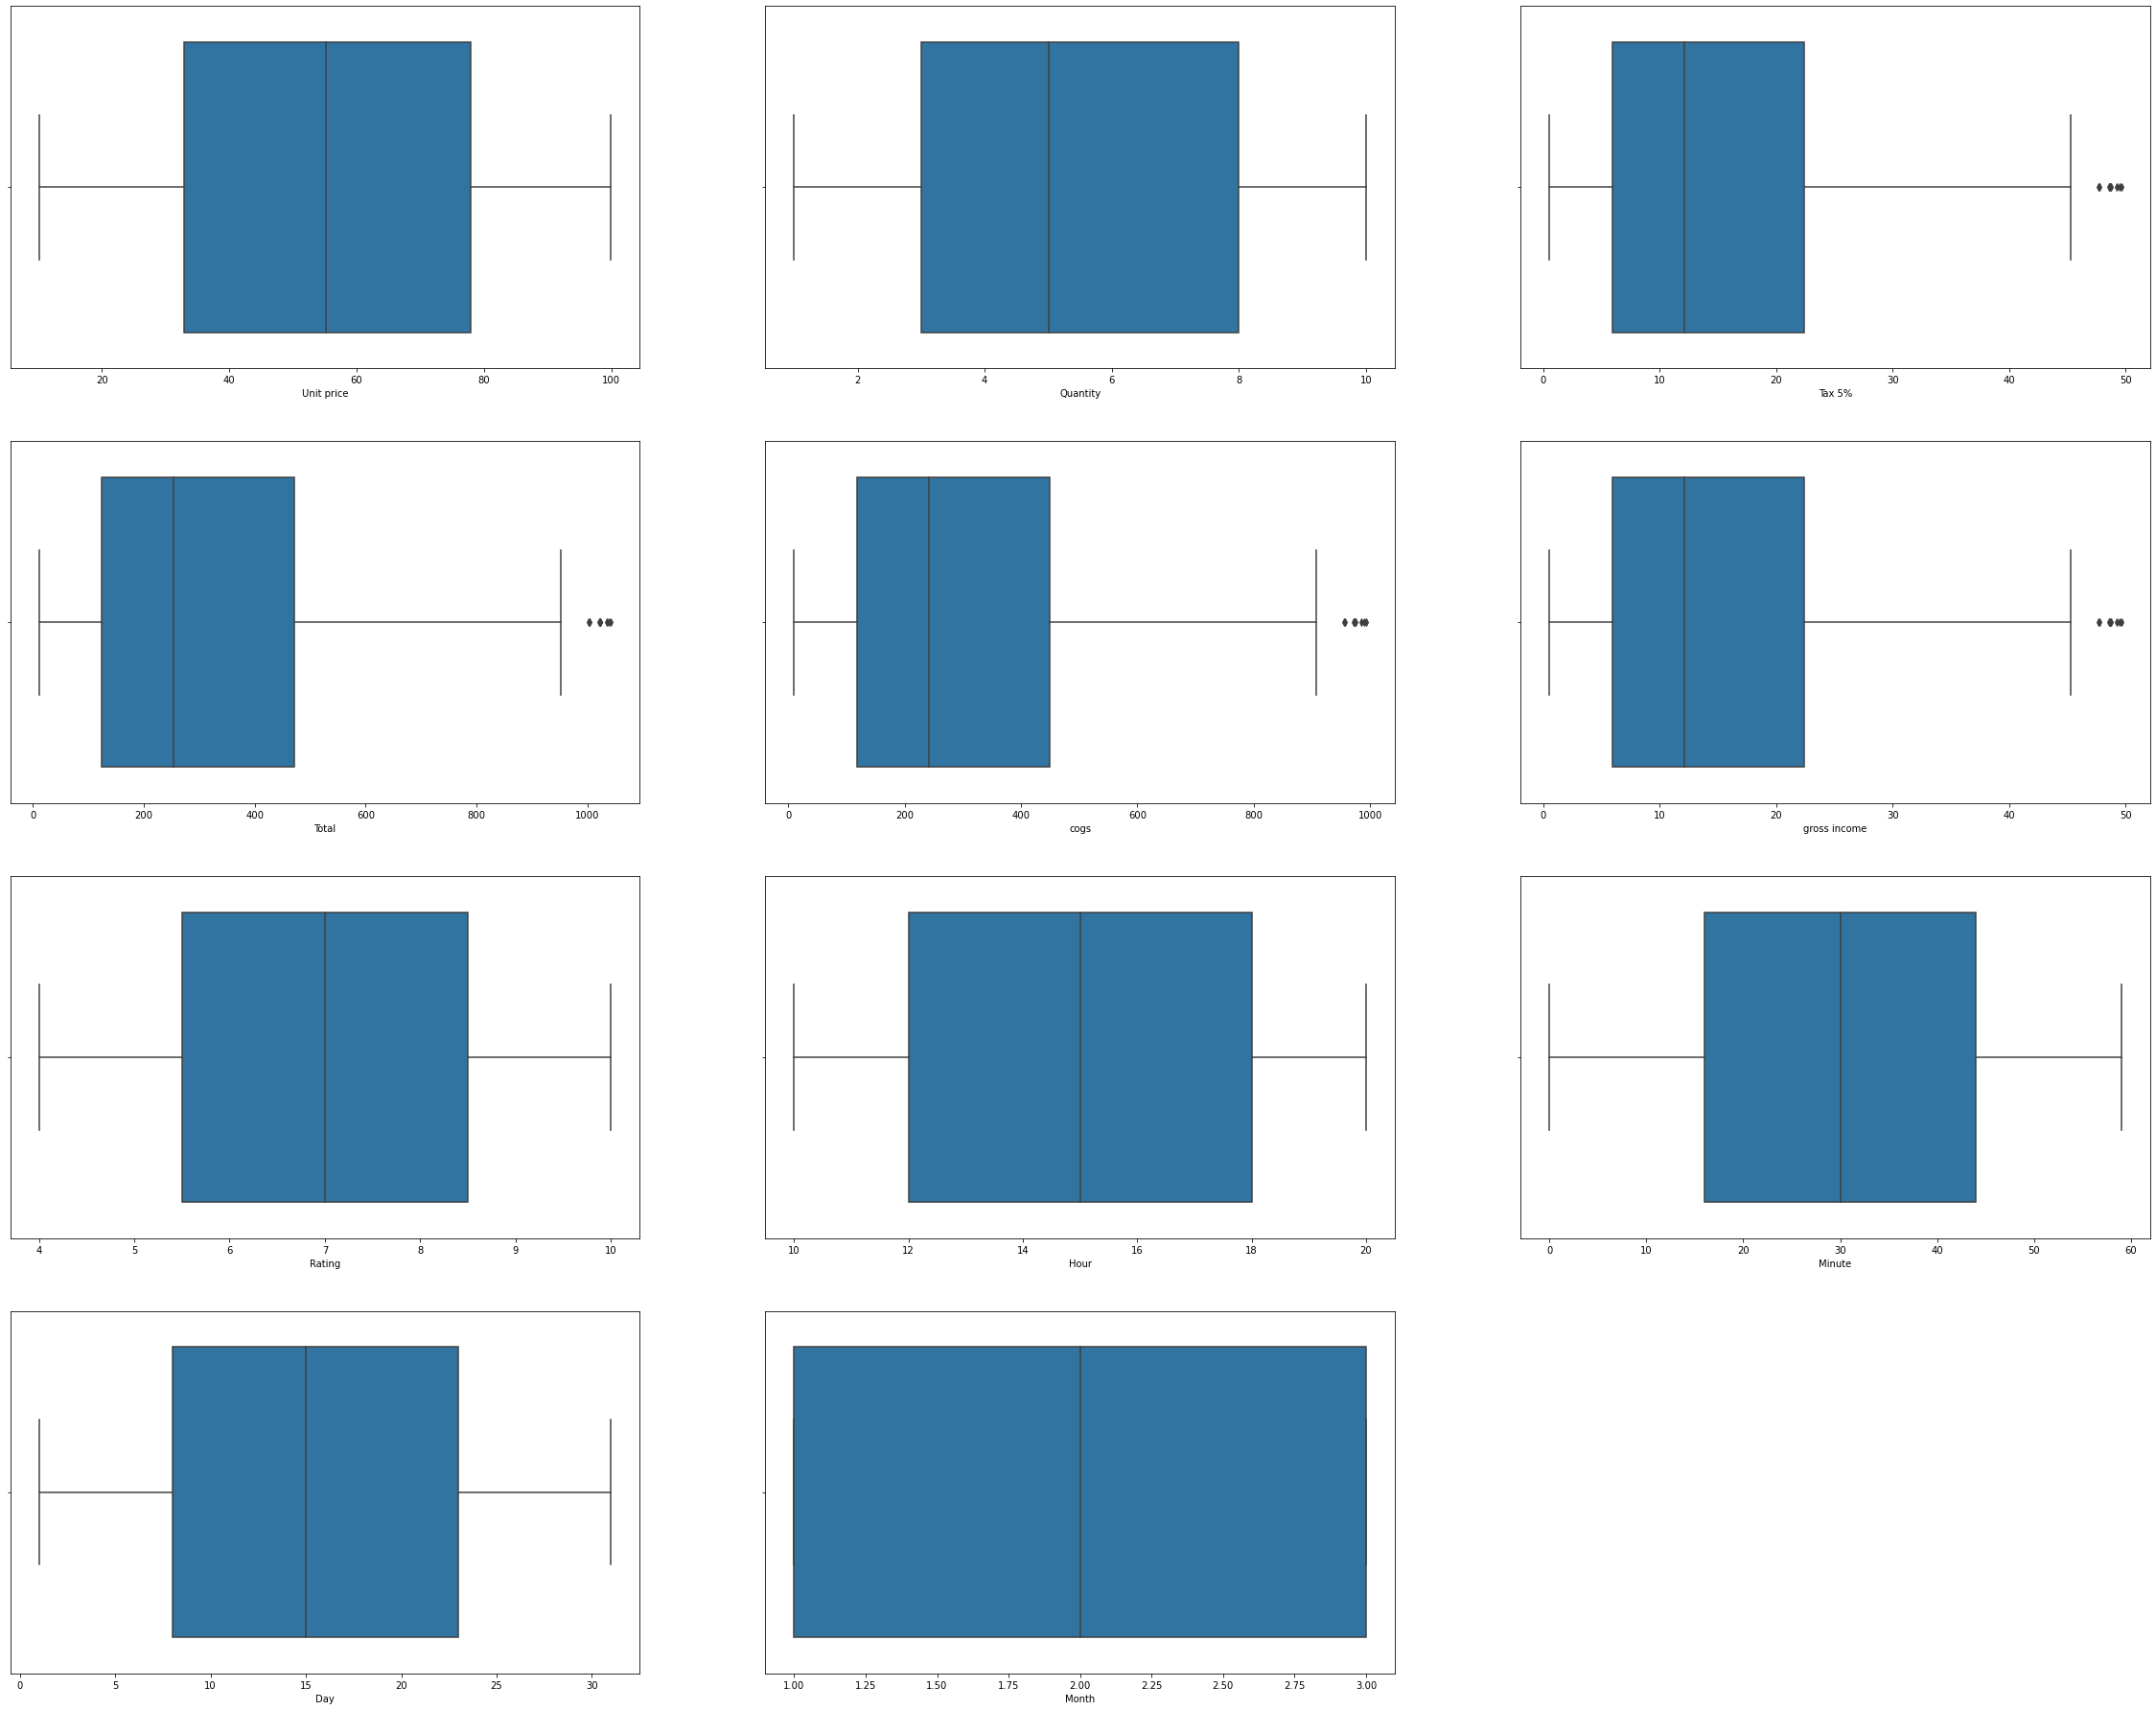

In [41]:
def outliers(df):
    num_col = df.select_dtypes(['float64','int64']).columns
    Ncol = len(num_col)//3+1

    fig, ax = plt.subplots(Ncol,3,figsize=(40,8*Ncol))
    for i, col in enumerate(num_col):
        sns.boxplot(data=df,x=col,ax=ax[i//3][i%3])

    for i in range(len(num_col),3*Ncol):
        fig.delaxes(ax[i//3][i%3])

    plt.show()
    
outliers(df)

From the graphs above, we can see that Tax 5%, cogs, Total and gross income have outliers. So now I will remove outlier.

### Remove outliers

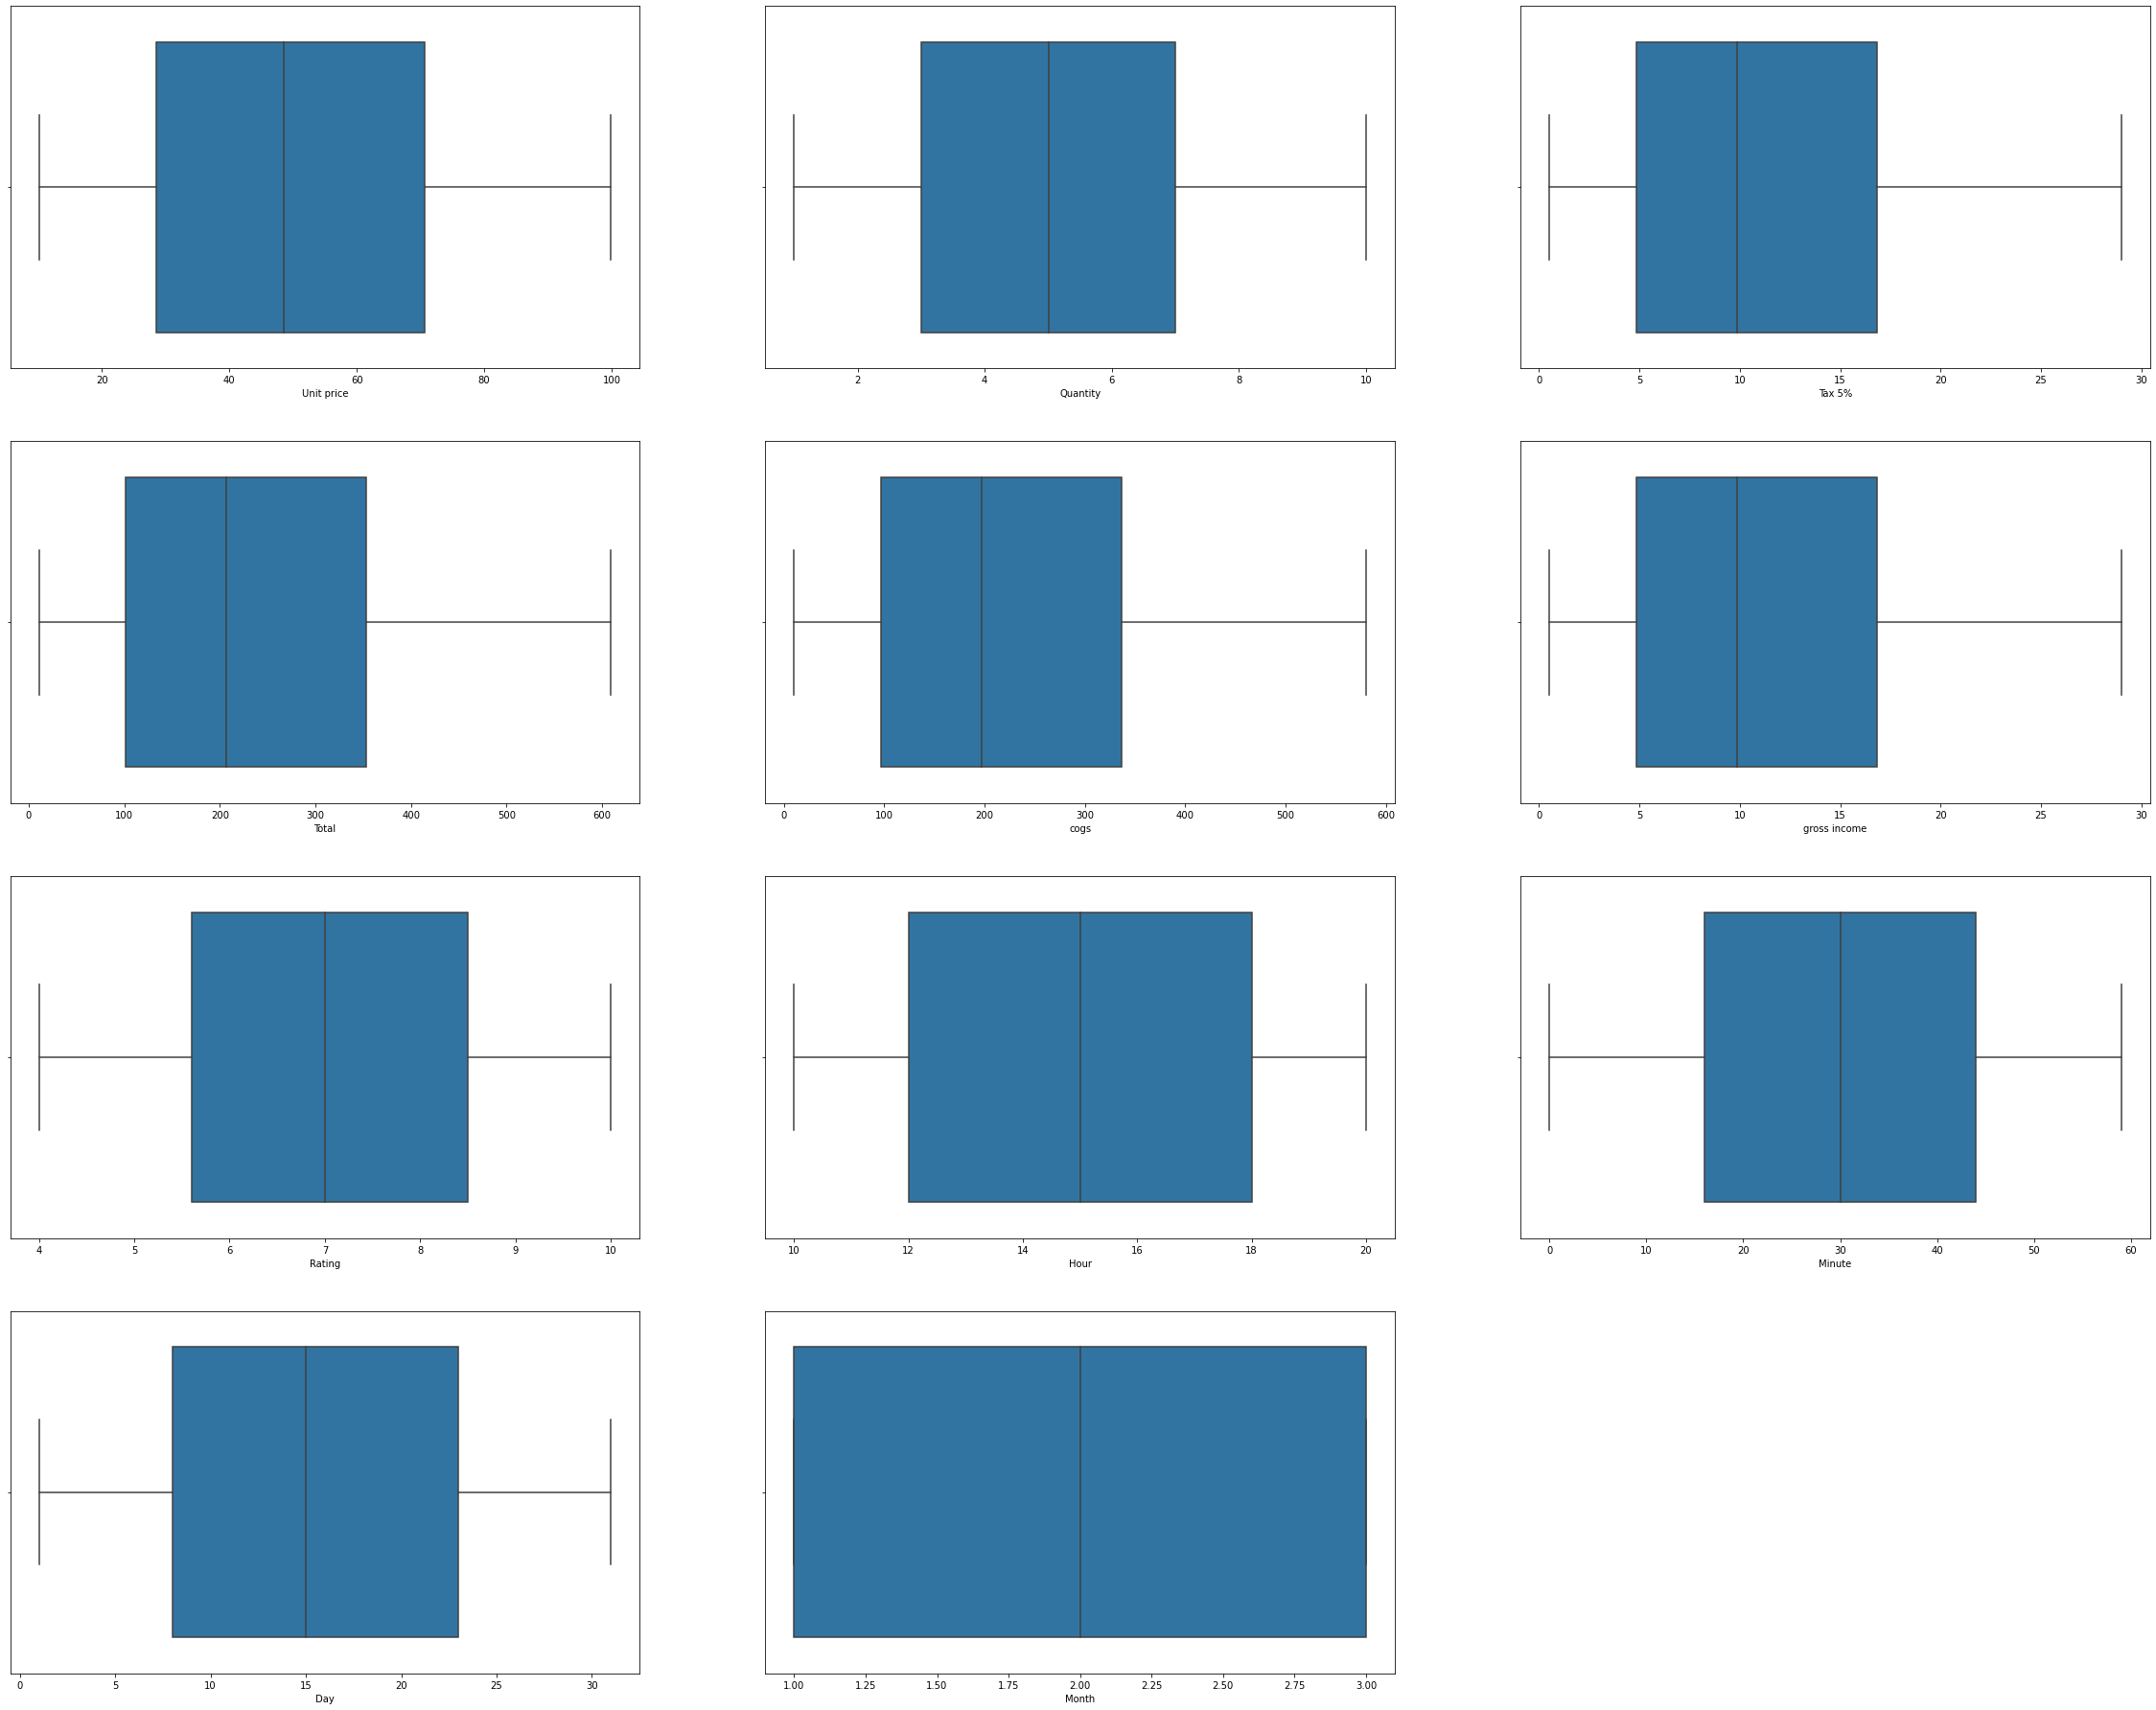

In [42]:
def remove_outlier(df, col_name):
    q = df[col_name].quantile([0.25,0.50,0.75])
    IQR = q[0.75]-q[0.25]
    lower = q[0.50]-1.5*IQR
    upper = q[0.50]+1.5*IQR
    return df[(df[col_name]>=lower) & (df[col_name]<=upper)]

df = remove_outlier(df,'Tax 5%')
df = remove_outlier(df,'cogs')
df = remove_outlier(df,'Total')
df = remove_outlier(df,'gross income')
outliers(df)

In [43]:
df = df.drop(columns='IsFashion')

In [44]:
df

,Branch,City,Customer type,Gender,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross income,Rating,Hour,Minute,Day,Month
0,A,Yangon,Member,Female,74.69,7,26.1415,548.9715,Ewallet,522.83,26.1415,9.1,13,8,5,1
1,C,Naypyitaw,Normal,Female,15.28,5,3.8200,80.2200,Cash,76.40,3.8200,9.6,10,29,8,3
2,A,Yangon,Normal,Male,46.33,7,16.2155,340.5255,Credit card,324.31,16.2155,7.4,13,23,3,3
3,A,Yangon,Member,Male,58.22,8,23.2880,489.0480,Ewallet,465.76,23.2880,8.4,20,33,27,1
6,A,Yangon,Member,Female,68.84,6,20.6520,433.6920,Ewallet,413.04,20.6520,5.8,14,36,25,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,B,Mandalay,Normal,Male,17.49,10,8.7450,183.6450,Ewallet,174.90,8.7450,6.6,18,35,22,2
994,C,Naypyitaw,Member,Female,60.95,1,3.0475,63.9975,Ewallet,60.95,3.0475,5.9,11,40,18,2
995,C,Naypyitaw,Normal,Male,40.35,1,2.0175,42.3675,Ewallet,40.35,2.0175,6.2,13,46,29,1
997,A,Yangon,Member,Male,31.84,1,1.5920,33.4320,Cash,31.84,1.5920,7.7,13,22,9,2


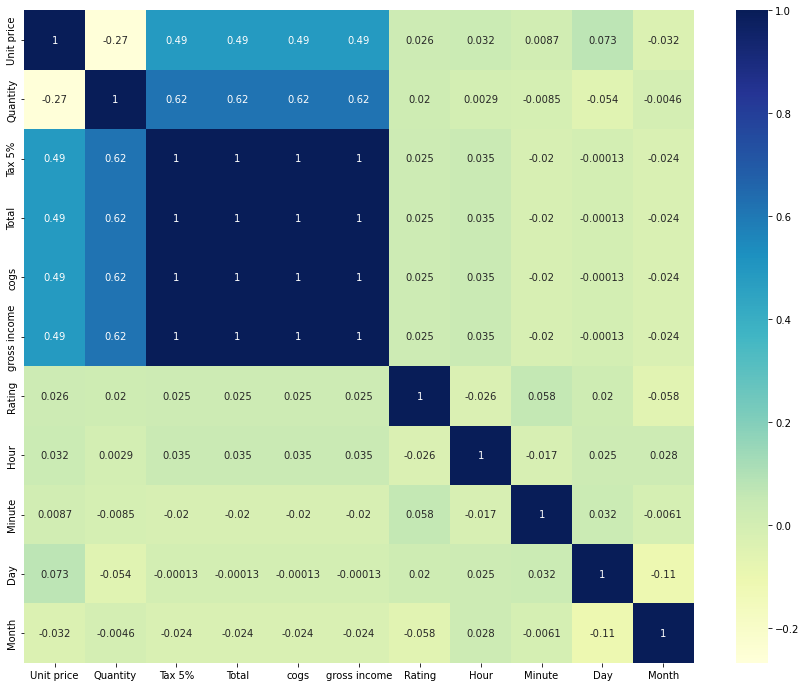

In [45]:
corr = df.corr(method='pearson')
plt.figure(figsize=(15,12))
sns.heatmap(corr,annot=True,cmap='YlGnBu')
plt.show()

<Figure size 720x576 with 0 Axes>

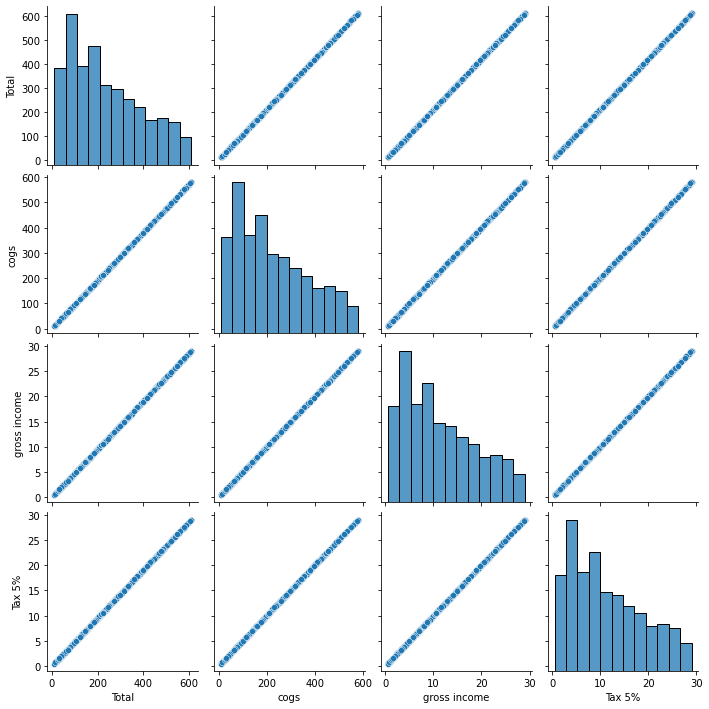

In [46]:
plt.figure(figsize=(10,8))
sns.pairplot(data=df,vars=['Total','cogs','gross income','Tax 5%'])
plt.show()

From the heatmap above, we can see that the Total, cogs, Tax 5%, gross income are perfectly correlated. This is very considerable, so let drop 3 of 4 attributes above (I choose cogs, gross income and Tax 5%).

In [47]:
df = df.drop(columns=['cogs','gross income','Tax 5%'])
df.head()

,Branch,City,Customer type,Gender,Unit price,Quantity,Total,Payment,Rating,Hour,Minute,Day,Month
0,A,Yangon,Member,Female,74.69,7,548.9715,Ewallet,9.1,13,8,5,1
1,C,Naypyitaw,Normal,Female,15.28,5,80.2200,Cash,9.6,10,29,8,3
2,A,Yangon,Normal,Male,46.33,7,340.5255,Credit card,7.4,13,23,3,3
3,A,Yangon,Member,Male,58.22,8,489.0480,Ewallet,8.4,20,33,27,1
6,A,Yangon,Member,Female,68.84,6,433.6920,Ewallet,5.8,14,36,25,2


### Relationship of cities and branches

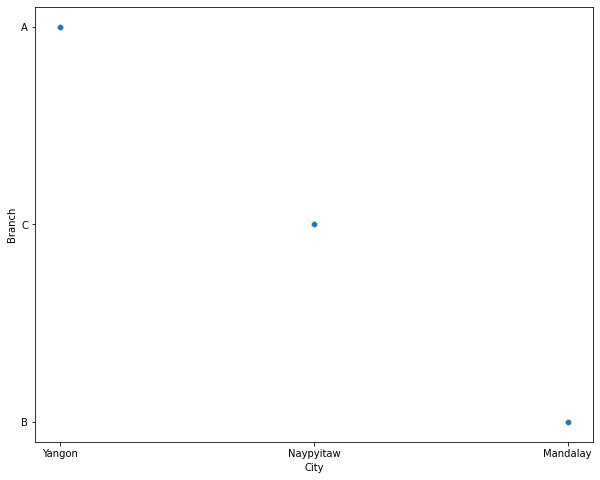

In [48]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df,x='City',y='Branch')
plt.show()

As a result, there is also a relationship between city and branch. Each branch is located at a specific city. So, we can also remove 1 of those two (I remove City in this case).

In [49]:
df = df.drop(columns="City")
df.head()

,Branch,Customer type,Gender,Unit price,Quantity,Total,Payment,Rating,Hour,Minute,Day,Month
0,A,Member,Female,74.69,7,548.9715,Ewallet,9.1,13,8,5,1
1,C,Normal,Female,15.28,5,80.2200,Cash,9.6,10,29,8,3
2,A,Normal,Male,46.33,7,340.5255,Credit card,7.4,13,23,3,3
3,A,Member,Male,58.22,8,489.0480,Ewallet,8.4,20,33,27,1
6,A,Member,Female,68.84,6,433.6920,Ewallet,5.8,14,36,25,2


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 846 entries, 0 to 998
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Branch         846 non-null    object 
 1   Customer type  846 non-null    object 
 2   Gender         846 non-null    object 
 3   Unit price     846 non-null    float64
 4   Quantity       846 non-null    int64  
 5   Total          846 non-null    float64
 6   Payment        846 non-null    object 
 7   Rating         846 non-null    float64
 8   Hour           846 non-null    int64  
 9   Minute         846 non-null    int64  
 10  Day            846 non-null    int64  
 11  Month          846 non-null    int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 85.9+ KB


In [51]:
list_1=list(df.columns)

In [52]:
list_cate=[]
for i in list_1: 
    if df[i].dtype=='object':
        list_cate.append(i)

In [53]:
from sklearn.preprocessing import LabelEncoder

In [54]:
le=LabelEncoder()

In [55]:
for i in list_cate:
    df[i]=le.fit_transform(df[i])

In [56]:
df

,Branch,Customer type,Gender,Unit price,Quantity,Total,Payment,Rating,Hour,Minute,Day,Month
0,0,0,0,74.69,7,548.9715,2,9.1,13,8,5,1
1,2,1,0,15.28,5,80.2200,0,9.6,10,29,8,3
2,0,1,1,46.33,7,340.5255,1,7.4,13,23,3,3
3,0,0,1,58.22,8,489.0480,2,8.4,20,33,27,1
6,0,0,0,68.84,6,433.6920,2,5.8,14,36,25,2
...,...,...,...,...,...,...,...,...,...,...,...,...
993,1,1,1,17.49,10,183.6450,2,6.6,18,35,22,2
994,2,0,0,60.95,1,63.9975,2,5.9,11,40,18,2
995,2,1,1,40.35,1,42.3675,2,6.2,13,46,29,1
997,0,0,1,31.84,1,33.4320,0,7.7,13,22,9,2


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 846 entries, 0 to 998
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Branch         846 non-null    int32  
 1   Customer type  846 non-null    int32  
 2   Gender         846 non-null    int32  
 3   Unit price     846 non-null    float64
 4   Quantity       846 non-null    int64  
 5   Total          846 non-null    float64
 6   Payment        846 non-null    int32  
 7   Rating         846 non-null    float64
 8   Hour           846 non-null    int64  
 9   Minute         846 non-null    int64  
 10  Day            846 non-null    int64  
 11  Month          846 non-null    int64  
dtypes: float64(3), int32(4), int64(5)
memory usage: 72.7 KB


In [58]:
y=df['Quantity']
X=df.drop('Quantity',axis=1)

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [61]:
print(X.shape)
print(y.shape)

(846, 11)
(846,)


In [62]:
print("Length of Training Data: {}".format(len(X_train)))
print("Length of Testing Data: {}".format(len(X_test)))

Length of Training Data: 634
Length of Testing Data: 212


In [63]:
from sklearn.preprocessing import RobustScaler, StandardScaler

In [64]:
scaler = RobustScaler()

In [65]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test) 

Even that we have create IsFashion and Hour which has relationship to Quantity, however, its "linear relationship" is very small. So we only use Total and Unit price to test with Linear regression model.

### Linear Regression

In [66]:
from sklearn.linear_model import LinearRegression

In [67]:
LR = LinearRegression()

In [68]:
LR.fit(X_train, y_train)

LinearRegression()

In [69]:
y_predict = LR.predict(X_test)

In [70]:
y_predict[0:5]

array([9.89110404, 4.79485137, 8.56236296, 9.11867136, 4.68982839])

In [71]:
y_test[0:5]

46     9
303    4
376    9
123    8
243    4
Name: Quantity, dtype: int64

### Model Evaluation

In [72]:
from sklearn.metrics import mean_squared_error, r2_score

In [73]:
# score the model on the train set
print('Train score:',LR.score(X_train,y_train))

# score the model on the test set
print('Test score:',LR.score(X_test,y_test))


Train score: 0.8058369161252767
Test score: 0.7515932593693596


In [74]:
# calculate the overall accuracy of the model
print('Overall model accuracy:',r2_score(y_test,y_predict))

# compute the mean squared error of the model
print('Mean Squared Error:',mean_squared_error(y_test,y_predict))

Overall model accuracy: 0.7515932593693596
Mean Squared Error: 1.9331940654396522


In [75]:
r2= r2_score(y_test,y_predict)

In [76]:
# Adjusted R2 score
1-(1-r2)*(len(df)-1)/(len(df)-7-1)

0.7495182627292469

In [77]:
LR.coef_

array([-1.34322052e-01, -5.80335512e-02, -5.46832955e-02, -3.60588077e+00,
        4.26685764e+00, -2.72169275e-02,  5.79656771e-02, -3.63932991e-02,
        3.28830740e-03, -6.36785002e-02, -3.94672205e-02])

In [78]:
residuals = y_test.values-y_predict

In [79]:
residuals

array([-8.91104040e-01, -7.94851367e-01,  4.37637038e-01, -1.11867136e+00,
       -6.89828388e-01, -1.69861968e+00,  6.56956744e-01,  2.91497268e+00,
       -8.71570252e-01,  7.77615212e-01, -4.09415690e-01, -1.16453154e+00,
        7.94513214e-01, -4.02575558e+00, -1.51996582e+00, -2.41703166e-01,
        2.54622978e+00, -6.18050694e-01,  2.80009591e-01, -1.10318061e+00,
        1.11115203e-01, -3.01780940e+00, -1.95412575e+00,  7.04576281e-01,
       -1.23045350e+00, -9.06937423e-01,  2.86428934e-01, -7.58531993e-01,
       -5.03030117e-01, -1.91231379e+00, -3.64190670e-03, -9.36420505e-01,
       -9.67498129e-01,  1.55708496e-01, -3.26702604e+00,  1.74095129e+00,
       -1.42254059e+00, -1.03657777e+00, -2.31985276e+00, -1.46276071e+00,
       -1.20588542e+00, -1.86248378e+00, -4.30005651e-01, -1.58627222e+00,
       -6.55481597e-01, -1.64118801e+00, -1.70945141e-01, -1.31909603e+00,
       -5.38616294e-01, -1.11506630e+00,  2.61986432e+00, -7.22594348e-01,
        1.10083397e+00,  

In [85]:
import statsmodels.api as sm

In [86]:
model = sm.OLS(y_train, X_train)
result=model.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:               Quantity   R-squared (uncentered):                   0.731
Model:                            OLS   Adj. R-squared (uncentered):              0.726
Method:                 Least Squares   F-statistic:                              153.8
Date:                Fri, 28 Oct 2022   Prob (F-statistic):                   2.20e-169
Time:                        16:08:51   Log-Likelihood:                         -1580.1
No. Observations:                 634   AIC:                                      3182.
Df Residuals:                     623   BIC:                                      3231.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### Lasso

In [87]:
from sklearn.linear_model import Lasso

In [88]:
# Train the model
lasso = Lasso(alpha =0.0001)
lasso.fit(X_train, y_train)
y_pred1 = lasso.predict(X_test)

In [89]:
r2=r2_score(y_test,y_pred1)
r2=r2_score(y_test,y_pred1)

In [90]:
r2=r2_score(y_test,y_pred1)

In [91]:
r2

0.7517300481167383

In [92]:
# score the model on the train set
print('Train score:',lasso.score(X_train,y_train))

# score the model on the test set
print('Test score:',lasso.score(X_test,y_test))

# calculate the overall accuracy of the model
print('Overall model accuracy:',r2_score(y_test,y_pred1))

# compute the mean squared error of the model
print('Mean Squared Error:',mean_squared_error(y_test,y_pred1))

Train score: 0.8058368498744752
Test score: 0.7517300481167383
Overall model accuracy: 0.7517300481167383
Mean Squared Error: 1.9321295243004704


### Ridge

In [93]:
from sklearn.linear_model import Ridge

In [94]:
# Train the model
Ridge = Ridge(alpha = 0.03)
Ridge.fit(X_train,y_train)
y_pred2 = Ridge.predict(X_test)

In [95]:
r2=r2_score(y_test,y_pred2)

In [96]:
r2

0.7516414942044517

In [97]:
# score the model on the train set
print('Train score:',Ridge.score(X_train,y_train))

# score the model on the test set
print('Test score:',Ridge.score(X_test,y_test))

# calculate the overall accuracy of the model
print('Overall model accuracy:',r2_score(y_test,y_pred2))

# compute the mean squared error of the model
print('Mean Squared Error:',mean_squared_error(y_test,y_pred2))

Train score: 0.8058368636504941
Test score: 0.7516414942044517
Overall model accuracy: 0.7516414942044517
Mean Squared Error: 1.9328186839314423


### Decision Tree

In [98]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

In [99]:
classifier = DecisionTreeClassifier(max_depth=3)

In [100]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [101]:
y_pred = classifier.predict(X_test)

In [102]:
from sklearn.metrics import accuracy_score

In [103]:
accuracy_score(y_test, y_pred)

0.24528301886792453

In [104]:
from sklearn.metrics import classification_report

In [105]:
print('classification_report:-\n', classification_report(y_test, y_pred))

classification_report:-
               precision    recall  f1-score   support

           1       0.79      0.45      0.58        33
           2       0.28      0.23      0.25        22
           3       0.20      0.17      0.18        24
           4       0.17      0.40      0.24        25
           5       0.16      0.52      0.24        21
           6       0.00      0.00      0.00        21
           7       0.00      0.00      0.00        18
           8       0.00      0.00      0.00        23
           9       0.00      0.00      0.00        13
          10       0.28      0.58      0.38        12

    accuracy                           0.25       212
   macro avg       0.19      0.24      0.19       212
weighted avg       0.23      0.25      0.21       212



### Random Forest`

In [106]:
from sklearn.ensemble import RandomForestClassifier

In [107]:
classifier= RandomForestClassifier(n_estimators=12)

In [108]:
classifier.fit(X_train,y_train)

RandomForestClassifier(n_estimators=12)

### Randomized searchCV

In [109]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

In [110]:
data = {"max_depth": [3, None],
            "max_features": randint(1, 9),
            "min_samples_leaf": randint(1, 9),
            "criterion": ["gini", "entropy"]}

In [111]:
Classifier = RandomForestClassifier()

In [112]:
Classifier

RandomForestClassifier()

In [117]:
Classifier_cv = RandomizedSearchCV(Classifier, data, cv = 4)
Classifier_cv.fit(X, y)


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001CEBD758A30>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001CEBD743400>})

In [118]:
Classifier_cv.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 8,
 'min_samples_leaf': 3}

In [119]:
print("Best score is :",(Classifier_cv.best_score_))

Best score is : 0.7600655012071895


## THE END